# Project:11 Term Deposit Subscription Prediction

#### Problem Statement 

The data is related to direct marketing campaigns (phone calls) of the banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 


We are going to build Decision Tree, Random Forest/XGBoost/Adaboost models to predict if the client will subscribe to a term deposit. 


# Model Selection

Our model selection to be based on Accuracy, Sensitivity, Specificity, F1 score, and area under the ROC curve. 

# Expected Outcome 

Higher AUC value and F1 Score in predicting the outcome using test data.

In [1]:
#Loading required Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import preprocessing

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost

In [40]:
#Load the dataset
df = pd.read_csv("bank-additional-full.csv", delimiter=';')  #semicolon delimited file so we use delimiter here

In [41]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [42]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [43]:
#display(data) It will take some time to execute

# Exploratory Data Analysis

In [45]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [46]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Missing Values

In [47]:
## Here we will check nan values present in each feature

#Making the list of features which has missing values

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
features_with_na

[]

##### Here empty list means our dataset has no missing values

### Numerical Variables

In [48]:
# list of numerical variables
num_var = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(num_var))

# visualise the numerical variables
df[num_var].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### Numerical variables are usually of 2 types

- 1. Continous variable
- 2. Discrete Variables

In [49]:
#Discrete Variables

discrete_var=[feature for feature in num_var if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_var)))

Discrete Variables Count: 3


In [50]:
df[discrete_var].head()

,previous,emp.var.rate,nr.employed
0,0,1.1,5191.0
1,0,1.1,5191.0
2,0,1.1,5191.0
3,0,1.1,5191.0
4,0,1.1,5191.0


In [51]:
import seaborn as sns

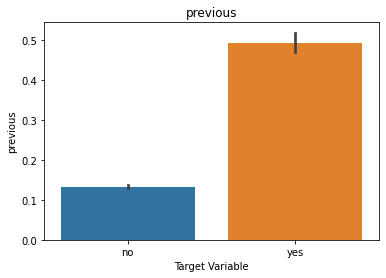

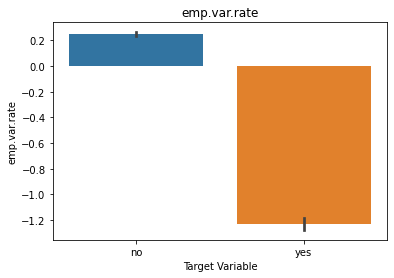

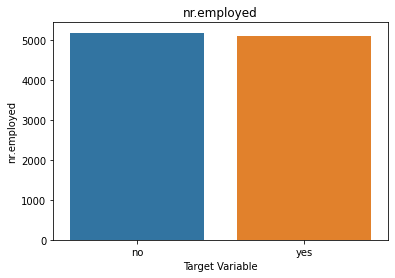

In [52]:
## Lets Find the realtionship between them and target variabl y

for feature in discrete_var:
    data=df.copy()
    sns.barplot(data["y"],data[feature], orient =  "v")
    plt.xlabel("Target Variable")
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

##### From above chart we can see that, *previous* : Number of contacts performed before this campaign and for this client is high for those person who has subscribed the bank deposit.

##### Also people having high Employment variation rate has subscribed less in comparison to people having low Employment variation rate.

In [53]:
#Continuous Variables

con_var=[feature for feature in num_var if len(df[feature].unique())>25]
print("continuous Variables Count: {}".format(len(con_var)))

continuous Variables Count: 7


In [54]:
df[con_var].head()

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,999,93.994,-36.4,4.857
1,57,149,1,999,93.994,-36.4,4.857
2,37,226,1,999,93.994,-36.4,4.857
3,40,151,1,999,93.994,-36.4,4.857
4,56,307,1,999,93.994,-36.4,4.857


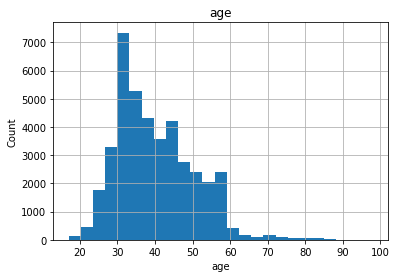

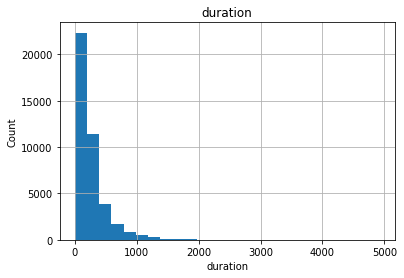

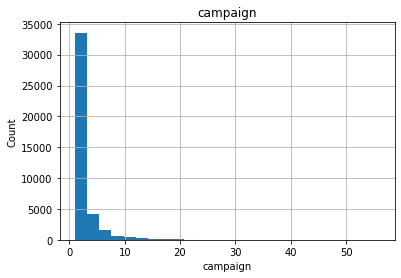

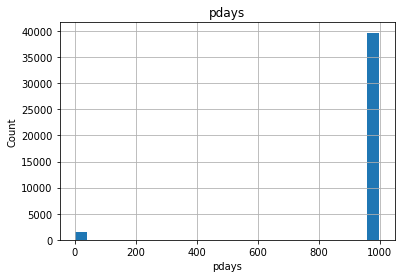

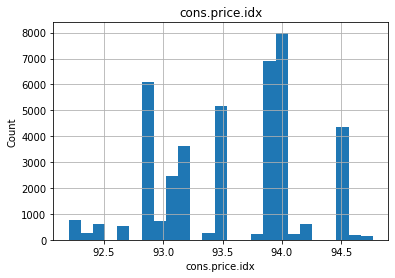

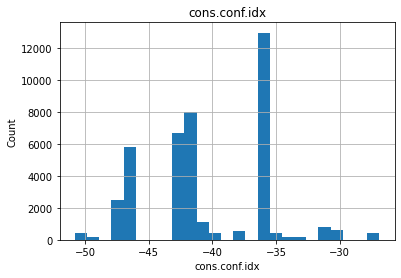

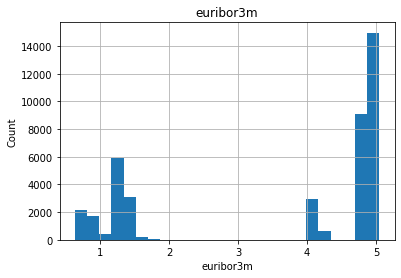

In [55]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in con_var:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

###### In continuous features only age feature is close to normal distribution and rest all are skewed.

##### Duration is right skewed it means that long last contact duration with client is less. This attribute highly affects the output target.

##### campaign is also right skewed which means that more number of contacts performed during this campaign and for this client is less. This attribute also affects the output target.

### Outliers

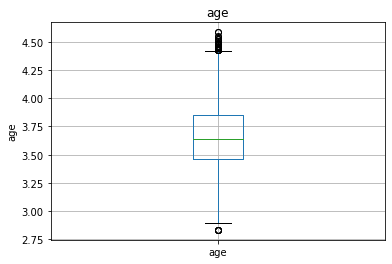

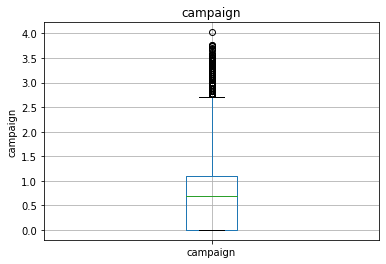

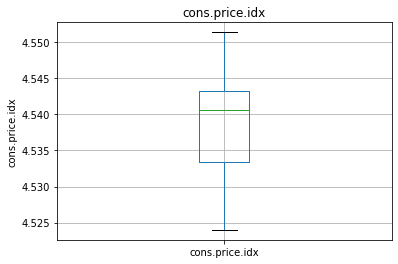

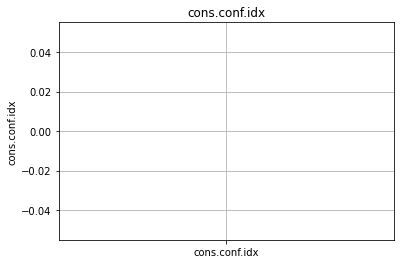

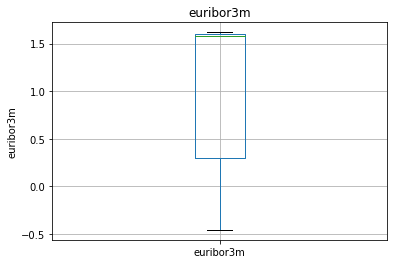

In [56]:
for feature in con_var:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

##### Looking at outliers after log transformation: age and duration attribute have more number of outliers.

### Categorical Variables

In [57]:
cat_var=[feature for feature in df.columns if df[feature].dtypes=='O']
cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [58]:
df[cat_var].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [59]:
for feature in cat_var:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is default and number of categories are 3
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is day_of_week and number of categories are 5
The feature is poutcome and number of categories are 3
The feature is y and number of categories are 2


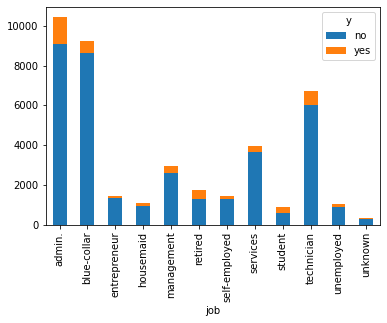

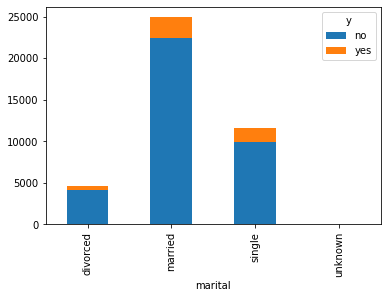

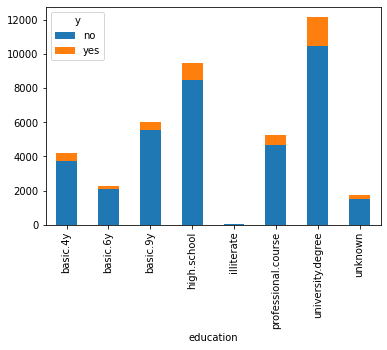

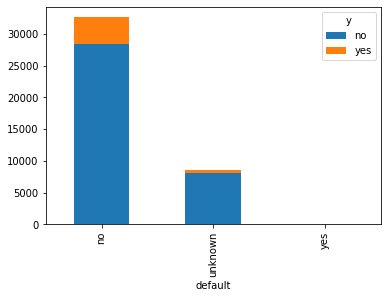

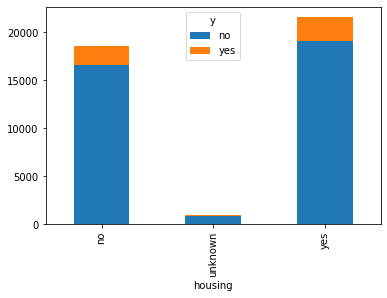

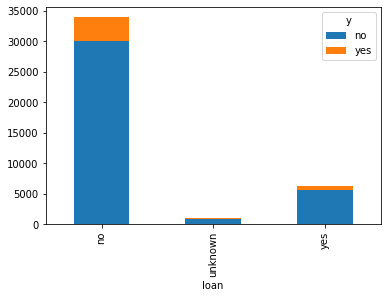

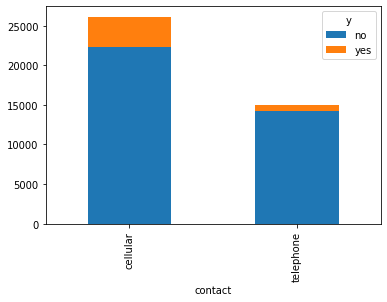

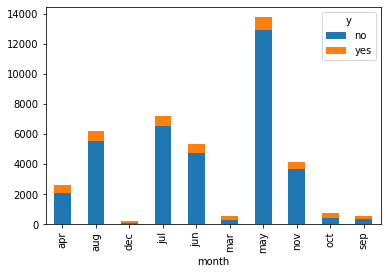

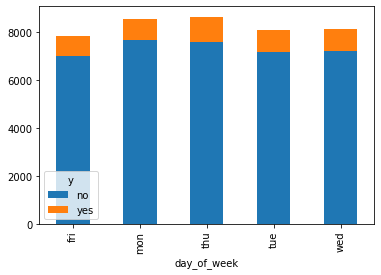

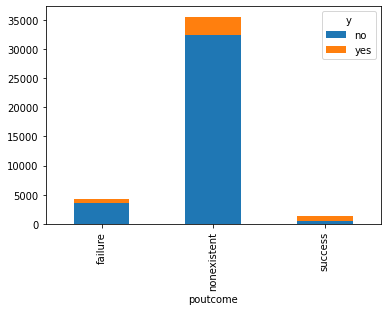

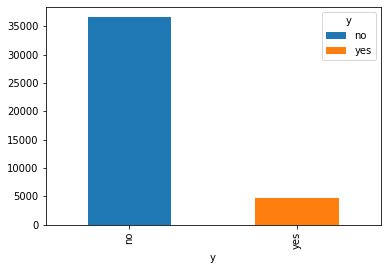

In [60]:
#Find out the relationship between categorical variable and dependent feature

for feature in cat_var:
    data=df.copy()
    ct=pd.crosstab(data[feature],data["y"])
    ct.plot.bar(stacked=True)
    plt.show()

## Feature Engineering

In [61]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [62]:
print("Dimension of dataste is {}".format(data.shape))

Dimension of dataste is (41188, 21)


# Label Encoding For Target Variable

In [63]:
c_y = {"y":{"yes": 1, "no": 0}}
df.replace(c_y, inplace = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Spliting Target Variable

In [64]:
predictor = df.iloc[:, df.columns !='y']
target = df.iloc[:, df.columns=='y' ]

# One Hot Encoding for Categorical Variables

In [65]:
#categorical variable in predictor
categorical_columns = [col for col in predictor.columns.values if predictor[col].dtype == 'object']

#dataframe with categorical features
data_cat = predictor[categorical_columns]

#dataframe with numerical features
data_num = predictor.drop(categorical_columns, axis =1)

In [66]:
#using pandas.get_dummies function to convert categorical variable into dummy/indicator variables

data_cat_dummies = pd.get_dummies(data_cat,drop_first = True)

In [67]:
#using concat function we are merging two dataframe for further analysis

predictor = pd.concat([data_num, data_cat_dummies], axis =1)

In [68]:
predictor.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [69]:
predictor.shape

(41188, 53)

# Splitting Dataset into Train & Test 

In [70]:
#Let us now split the dataset into train & test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictor,
                                                 target,test_size = 0.30, random_state = 0)

print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (28831, 53)
x_test (12357, 53)
y_train (28831, 1)
y_test (12357, 1)


# Model Creation

## Decision Tree Classifier

### RandomizedSearchCV for best parameters for DecisionTreeClassifier

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

#Criterion
criterion = ["gini", "entropy"]

#Splitter
splitter = ["best", "random"]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3, 4, 5, 7, 9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [72]:
DT=DecisionTreeClassifier()

DT_randomcv=RandomizedSearchCV(estimator=DT,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
DT_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              9],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [73]:
DT_randomcv.best_estimator_

DecisionTreeClassifier(max_depth=780, max_features='log2', min_samples_leaf=8)

In [74]:
#best parameters
DT_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 780,
 'criterion': 'gini'}

In [122]:
#best decision tree classifier
DT_clf = DT_randomcv.best_estimator_

In [123]:
DT_clf

DecisionTreeClassifier(max_depth=780, max_features='log2', min_samples_leaf=8)

In [124]:
#prediction using DT_clf (decision tree)
y_pred_DT=DT_clf.predict(x_test)

In [125]:
#printing confusion matrix, accuracy and classification report

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test,y_pred_DT))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_DT)))
print("Classification report: {}".format(classification_report(y_test,y_pred_DT)))

[[10595   374]
 [  858   530]]
Accuracy Score 0.9002994254268836
Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10969
           1       0.59      0.38      0.46      1388

    accuracy                           0.90     12357
   macro avg       0.76      0.67      0.70     12357
weighted avg       0.89      0.90      0.89     12357



##### Accuracy is 90% and precision for 0 class is 93% but precision for class 1 is 59% and recall is also not good for class 1. Let's see if we can improve this with the help of some different classifiers.

### ROC Curve for Decision Tree Calssifier

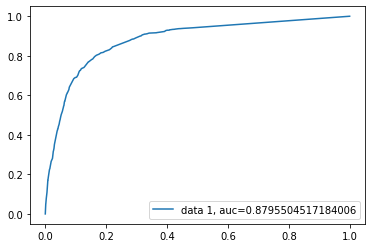

In [126]:
y_proba_DT = DT_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_proba_DT)
auc = metrics.roc_auc_score(y_test, y_proba_DT)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### Area Under Curve with respect to Decision Tree Classifier is approx 88%

### Important Features according to Decision Tree

<AxesSubplot:>

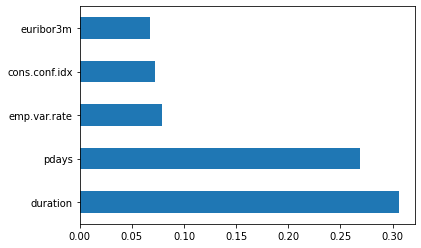

In [203]:
(pd.Series(DT_clf.feature_importances_, index=predictor.columns)
   .nlargest(5)
   .plot(kind='barh'))

## Random Forest Classifier


### RandomizedSearchCV for best parameters for RandomForestClassifier

In [84]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3, 4, 5, 7, 9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [85]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   

In [86]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 450,
 'criterion': 'gini'}

In [87]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=450, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=9, n_estimators=600)

In [128]:
RF_clf = rf_randomcv.best_estimator_

In [129]:
#prediction using RF_clf 
y_pred_RF = RF_clf.predict(x_test)

In [130]:
#printing confusion matrix, accuracy and classification report

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test,y_pred_RF))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_RF)))
print("Classification report: {}".format(classification_report(y_test,y_pred_RF)))

[[10708   261]
 [  776   612]]
Accuracy Score 0.916079954681557
Classification report:               precision    recall  f1-score   support

           0       0.93      0.98      0.95     10969
           1       0.70      0.44      0.54      1388

    accuracy                           0.92     12357
   macro avg       0.82      0.71      0.75     12357
weighted avg       0.91      0.92      0.91     12357



### ROC Curve for Random Forest Calssifier

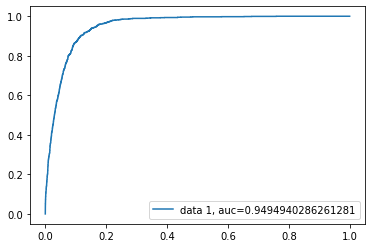

In [131]:
y_proba_RF = RF_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_proba_RF)
auc = metrics.roc_auc_score(y_test, y_proba_RF)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### Area Under Curve with respect to Random Forest  Classifier is aprrox 95%

# Important Features according to Random Forest

<AxesSubplot:>

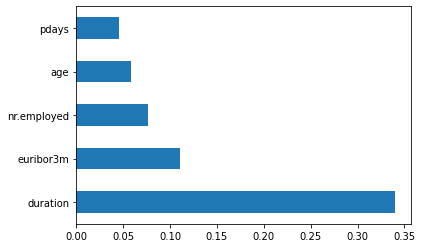

In [201]:
(pd.Series(RF_clf.feature_importances_, index=predictor.columns)
   .nlargest(5)
   .plot(kind='barh'))

## XGBoost

### Hyperparameter optimization using RandomizedSearchCV For XGBoost

In [94]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [95]:
classifier=xgboost.XGBClassifier()

In [96]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [97]:
xg_randomcv=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)

In [98]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [99]:
from datetime import datetime

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable

xg_randomcv.fit(x_train,y_train)

timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[12:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 1 minutes and 22.65 seconds.


In [101]:
xg_randomcv.best_params_

{'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [102]:
xg_randomcv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
xg_clf = xg_randomcv.best_estimator_

In [133]:
#prediction using xg_clf 
y_pred_XG = xg_clf.predict(x_test)

In [134]:
#printing confusion matrix, accuracy and classification report

#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report

print(confusion_matrix(y_test,y_pred_XG))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_XG)))
print("Classification report: {}".format(classification_report(y_test,y_pred_XG)))

[[10638   331]
 [  672   716]]
Accuracy Score 0.9188314315772437
Classification report:               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10969
           1       0.68      0.52      0.59      1388

    accuracy                           0.92     12357
   macro avg       0.81      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



### ROC Curve for XGBoost Calssifier

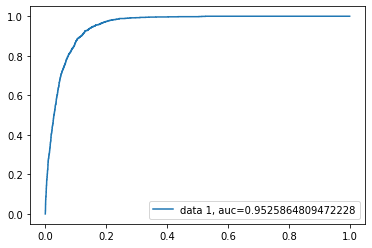

In [135]:
y_proba_XG = xg_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_proba_XG)
auc = metrics.roc_auc_score(y_test,y_proba_XG)
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

##### Area Under Curve with respect to XGBoost Classifier is 95%

## Important Features according to XGBoost

<AxesSubplot:>

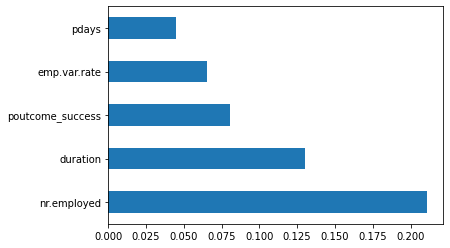

In [200]:
(pd.Series(xg_clf.feature_importances_, index=predictor.columns)
   .nlargest(5)
   .plot(kind='barh'))

## Adaboost Classifier

In [107]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [108]:
classifier = AdaBoostClassifier()

In [109]:
params={"n_estimators":[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        "learning_rate":[0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.50]}

In [111]:
Ada_randomcv=RandomizedSearchCV(estimator=classifier,param_distributions=params,
                                n_iter=10,cv=3,verbose=2, random_state=42,n_jobs=-1)

### fit the randomized model
Ada_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.5],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [112]:
Ada_randomcv.best_params_

{'n_estimators': 2000, 'learning_rate': 0.25}

In [113]:
Ada_randomcv.best_estimator_

AdaBoostClassifier(learning_rate=0.25, n_estimators=2000)

In [136]:
Ada_clf = Ada_randomcv.best_estimator_

In [137]:
#prediction using Ada_clf 
y_pred_Ada = Ada_clf.predict(x_test)

In [138]:
#printing confusion matrix, accuracy and classification report

#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report

print(confusion_matrix(y_test,y_pred_Ada))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_Ada)))
print("Classification report: {}".format(classification_report(y_test,y_pred_Ada)))

[[10678   291]
 [  759   629]]
Accuracy Score 0.9150279193979121
Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10969
           1       0.68      0.45      0.55      1388

    accuracy                           0.92     12357
   macro avg       0.81      0.71      0.75     12357
weighted avg       0.91      0.92      0.91     12357



### ROC Curve for Adaboost Classifier

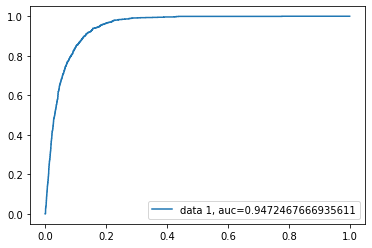

In [139]:
y_proba_Ada = Ada_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_proba_Ada)
auc = metrics.roc_auc_score(y_test, y_proba_Ada)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### Area Under Curve with respect to AdaBoost Classifier is approx 95%

### Important Features according to AdaBoost

<AxesSubplot:>

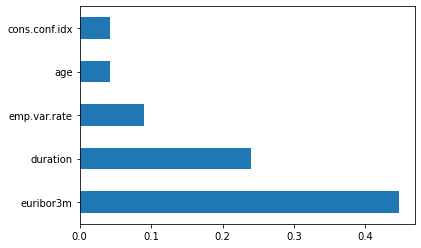

In [202]:
(pd.Series(Ada_clf.feature_importances_, index=predictor.columns)
   .nlargest(5)
   .plot(kind='barh'))

##### From all the models important features we see that pdays and duration of last call is very important.

##### pdays means number of days that passed by after the client was last contacted from a previous campaign.

# Models Report

In [187]:
#creating columns with all metrics
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']

#converting it into dataframe
models_report = pd.DataFrame(columns = cols)


tmp1 = {'Model': " Decision Tree Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_DT),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_DT),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_DT)}

m1 = models_report.append(tmp1, ignore_index = True)
m1

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree Classifier,0.673874,0.586283,0.381844,0.900299,0.410221


In [188]:
tmp2 =  {'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_RF),
                 'Precision Score': metrics.precision_score(y_test, y_pred_RF),
                 'Recall Score': metrics.recall_score(y_test, y_pred_RF),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_RF),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_RF)}

m2 = models_report.append(tmp2, ignore_index = True)
m2

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Random Forest Classifier,0.708564,0.701031,0.440922,0.91608,0.497792


In [189]:
tmp3 = {'Model': " XGBoost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_XG),
                 'Precision Score': metrics.precision_score(y_test, y_pred_XG),
                 'Recall Score': metrics.recall_score(y_test, y_pred_XG),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_XG),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_XG)}

m3 = models_report.append(tmp3, ignore_index = True)
m3

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,XGBoost Classifier,0.742837,0.683859,0.51585,0.918831,0.544048


In [190]:

tmp4 = pd.Series({'Model': " Adaboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_Ada),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Ada),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Ada),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Ada),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Ada)})
                

m4 = models_report.append(tmp4, ignore_index = True)
m4

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Adaboost Classifier,0.71332,0.683696,0.45317,0.915028,0.500315


In [191]:
#list of all models metrics
frames = [m1,m2,m3,m4]

In [192]:
Models_Report = pd.concat(frames, ignore_index=True)

In [193]:
Models_Report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree Classifier,0.673874,0.586283,0.381844,0.900299,0.410221
1,Random Forest Classifier,0.708564,0.701031,0.440922,0.916080,0.497792
2,XGBoost Classifier,0.742837,0.683859,0.515850,0.918831,0.544048
3,Adaboost Classifier,0.713320,0.683696,0.453170,0.915028,0.500315


##### From the above information XGBoost Classifier gives optimum result

In [194]:
y_pred_XG

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [195]:
Prediction = pd.DataFrame(y_pred_XG)

In [198]:
Prediction.head(100)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
